In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data,color, io
from skimage import img_as_float
from skimage.morphology import reconstruction

In [1]:
from skimage import (
    color, feature, filters, io, measure, morphology, segmentation, util
)

In [3]:
original_image = io.imread("/work/vajira/DL/sinGAN/SinGAN/Input/Paint/sperm_sample_2.jpg")

In [4]:
original_image.shape

(480, 640, 3)

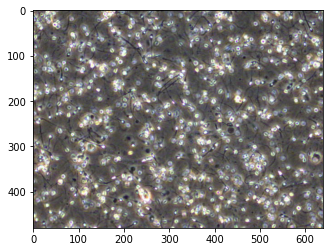

In [5]:
fig, ax = plt.subplots()
ax.imshow(original_image, cmap='gray')


In [6]:
thresholds = filters.threshold_multiotsu(original_image, classes=2)

In [7]:
cells = original_image > thresholds[0]

In [8]:
cells.shape

(480, 640, 3)

In [9]:
cells = cells.astype(int)

In [10]:
cells.shape

(480, 640, 3)

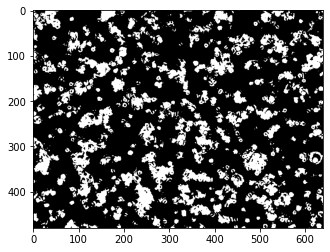

In [11]:
fig, ax = plt.subplots()
ax.imshow(cells[:,:,0], cmap="gray")

In [12]:
gen_mask = io.imread("/work/vajira/DL/sinGAN/SinGAN/Output/Paint2image/dot_sperm/sperm_sample_2_out/start_scale=7.png")

In [13]:
gen_mask = gen_mask[:,:,0:3]

In [14]:
gen_mask.shape

(187, 250, 3)

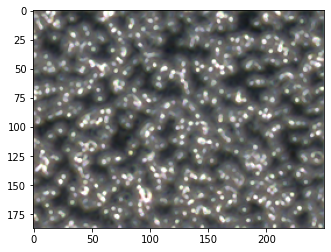

In [15]:
fig, ax = plt.subplots()
ax.imshow(gen_mask, cmap='gray')

In [16]:
thresholds = filters.threshold_multiotsu(gen_mask, classes=2)

In [19]:
cells = gen_mask > thresholds[0]
cells = cells.astype(int)

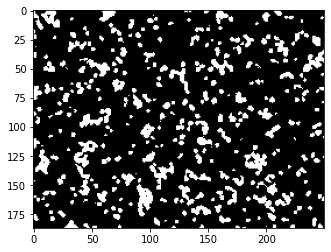

In [20]:
fig, ax = plt.subplots()
ax.imshow(cells[:,:,0], cmap="gray")

## Another way to clean

In [21]:
gen_mask = img_as_float(gen_mask)
g_image = gaussian_filter(gen_mask, 1)

In [22]:
gen_mask.shape

(187, 250, 3)

In [23]:
seed = np.copy(gen_mask)

In [41]:
seed[:, :, :] = g_image.min()

In [42]:
mask = g_image

In [43]:
mask.shape

(187, 250, 3)

In [44]:
seed.shape

(187, 250, 3)

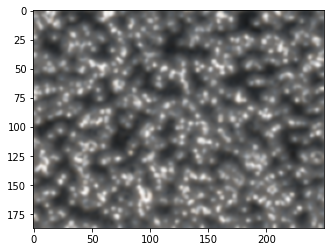

In [45]:
fig, ax = plt.subplots()
ax.imshow(g_image, cmap="gray")

In [46]:


mask = g_image

dilated = reconstruction(seed, mask, method='dilation')

In [52]:
dilated

array([[[0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        ...,
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803]],

       [[0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        ...,
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803]],

       [[0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        ...,
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803]],

       ...,

       [[0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0.10070803, 0.10070803],
        [0.10070803, 0

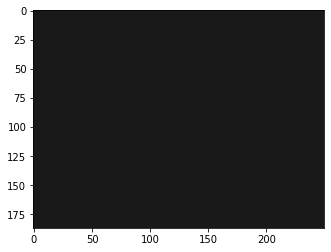

In [53]:
fig, ax = plt.subplots()
ax.imshow(dilated, vmin=g_image.min(), vmax=g_image.max(), cmap='gray')

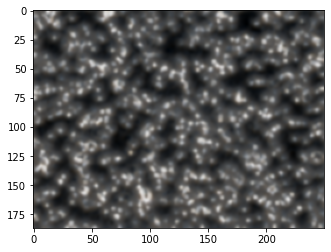

In [54]:
fig, ax = plt.subplots()
ax.imshow(g_image  - dilated, cmap='gray')

### Convert color image to gray image

In [6]:
image_path = "/work/vajira/DL/sinGAN/SinGAN-aug/Input/Images/sperm-sample.png"

In [7]:
img = io.imread(image_path)

In [8]:
img.shape

(1562, 2090, 4)

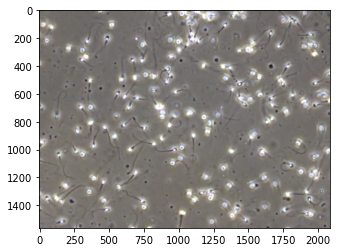

In [12]:
plt.imshow(img)

In [9]:
img_gray = color.rgb2gray(img)

In [11]:
img_gray.shape

(1562, 2090)

In [ ]:
plt.imshow()